# Pendahuluan
![](https://th.bing.com/th/id/OIP.5S1XJ9ZYf6BTqayxaZKO8QHaD4?rs=1&pid=ImgDetMain)

sumber gambar: bark.us

Instagram sebagai salah satu media sosial terbesar telah menjadi lingkungan untuk berbagi foto, video, serta momen-momen penting lainnya. Namun, hal ini memunculkan masalah baru, yaitu pembulian secara online atau cyber bullying. Cyber bulllying adalah perilaku agresif yang dilakukan oleh kelompok atau individu menggunakan media elektronik untuk membuat marah, mempermalukan, atau memalukan seseorang (Unicef). Perilaku cyber bullying sering terjadi di media sosial dan menyerang bisa menyerang siapa saja, terutama pada kolom komentar yang pada umumnya dapat diakses oleh siapa saja. Tindakan ini membawa dampak negatif kepada korban, mulai dari turunnya reputasi, turunnya mentalitas, serta turunnya rasa kepercayaan diri.
Pada percobaan ini, akan dilakukan analisa dan juga pemodelan dari dataset yang mengandung komentar-komentar dari platform instagram. Dataset dapat anda akses pada link berikut: https://www.kaggle.com/datasets/deniyulian/sentiment-analysis

# Preprocessing data

**Menyiapkan libary yang digunakan**

In [1]:
import pandas as pd
import string

#visualisasi
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

#modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix

**Membaca data**

In [2]:
data = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


**Menghitung jumlah nilai NULL**

In [3]:
data.isnull().sum()

Id                        0
Sentiment                 0
Instagram Comment Text    0
dtype: int64

**Mengubah semua huruf pada data komentar menjadi huruf kecil**

In [4]:
data['Instagram Comment Text'] = data['Instagram Comment Text'].str.lower()

**Menghapus karakter spesial pada data komentar**

In [5]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))
data['Instagram Comment Text'] = data['Instagram Comment Text'].apply(remove_special_characters)

# EDA (Exploratory Data Analysis)

**Contoh dari komentar positif sebagai berikut**

In [6]:
print("Positive comment example: \n\n")
for i in range (1,11):
    print("Komentar #"+str(i))
    positive_comment = data[data['Sentiment'] == 'positive']['Instagram Comment Text'].iloc[i]
    print(positive_comment+"\n")

Positive comment example: 


Komentar #1
lagu barunya mbak tata kan kisah nyatanya rumah tangga mbak tata jadi rasanya mbak tata bener2 sayang get sama suaminya syukur kalau baikan semoga awet

Komentar #2
yg komen kenapa si mbak ini ga sedih malah ketawa2 ya iyalah klo kita dah disakiti sm pasangan smpe berlarut2 ngapain juga sih kita sedih ampe depresi segala serahin sm allah ajabawa happy aja mski sakit lagian si mba senyum2 di wajahnya tp hatinya mana tau kan senyumannya bs jd buat menetralisir kondisi hatinya yg lg terpuruk ada pepatah bilang  klo bahagia jgn trllu bahagia klo sedih juga jgn trllu sedih diimbangi aja biar ga gila 

Komentar #3
suka banget sama pasangan satu ini semoga gigi dan raffi menjadi keluarga sakinnah mawaddah warrahmah semoga tidak ada pihak2 yang ingin memisahkan mereka jodoh sampai maut memisahkan amiin

Komentar #4
jemima kan anak angkat celine eleeya anak hubungan celine dan dirly dan saya terharu saya tau kalau jemima adalah anak panti asuhan yang dia

Dari 10 komentar positif diatas, dapat dilihat bahwa ciri-ciri dari komentar positif adalah menggunakan kata-kata yang memiliki kesan supportive, kagum, dan membela suatu pihak yang benar berdasarkan perspektif pengomentar.

**Contoh komentar negatif sebagai berikut**

In [7]:
print("Negative comment example: \n\n")
for i in range (1,11):
    print("Komentar #"+str(i))
    negative_comment = data[data['Sentiment'] == 'negative']['Instagram Comment Text'].iloc[i]
    print(negative_comment+"\n")

Negative comment example: 


Komentar #1
geblek lo tatacowo bgt dibela2in balikanhadewwntar ditinggal lg nyalahin tuh cowopadahal kitenya yg oon

Komentar #2
kmrn termewek2 skr lengket lg duhhh kok labil bgt sih mbak kya abege ajah ato yg kmrn cari sensasi biar top markotoppp ertong gk berkualitas

Komentar #3
intinya kalau kesel dengan att nya gausah ke anaknya juga kasian buat perkembangan psikis anak kedepannya itu orang bener bener tolol skrg seandainya dia punya anak terus anaknya dikatain sama orang yang benci sama dia gimana perasaan dia  benci sama seseorang boleh tapi harus tau batesnya  toh namanya manusia gaakan semua jadi penyuka pasti ada haters 

Komentar #4
hadewwwww permpuan itu lgsakit jiwaknp harus dia yg jd peran utama di film hantu jeruk purutky khabisan stok artis ja

Komentar #5
pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya

Komentar 

Dari 10 komentar diatas, dapat dilihat bahwa komentar negatif memiliki ciri-ciri menggunakan kata-kata kasar, menyudutkan suatu pihak, terkesan menduga-duga, serta menggunakan kata umpatan kepada pihak yang dituju

**Visualisasi proporsi data positif dan data negatif**

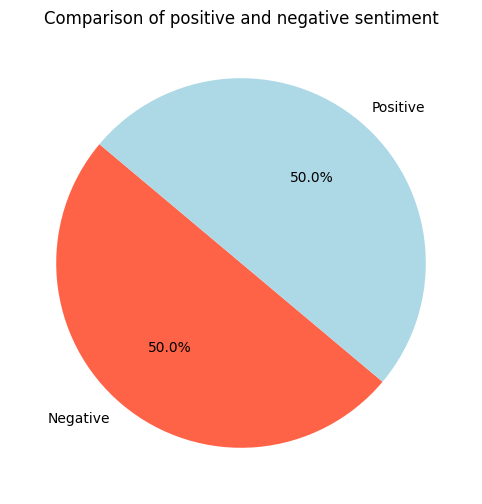

In [8]:
sentiment_proposition = data['Sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sentiment_proposition, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'lightblue'])
plt.title('Comparison of positive and negative sentiment')
plt.show()

**Menghitung 10 kata terbanyak yang muncul pada komentar positif dan negatif**

In [9]:
#pisahkan komentar positif dan negatif
positive_com = data[data['Sentiment'] == 'positive']['Instagram Comment Text']
negative_com = data[data['Sentiment'] == 'negative']['Instagram Comment Text']

positive_word = Counter()
positive_com.apply(lambda x: positive_word.update(x.split()))

negative_word = Counter()
negative_com.apply(lambda x: negative_word.update(x.split()))

spam_positive = positive_word.most_common(10)
spam_negative = negative_word.most_common(10)

spam_positive_df = pd.DataFrame(spam_positive, columns=['Word','Frequency'])
spam_negative_df = pd.DataFrame(spam_negative, columns=['Word','Frequency'])

**Melakukan visualisasi kata yang palinng sering muncul di komentar positif dan negatif**

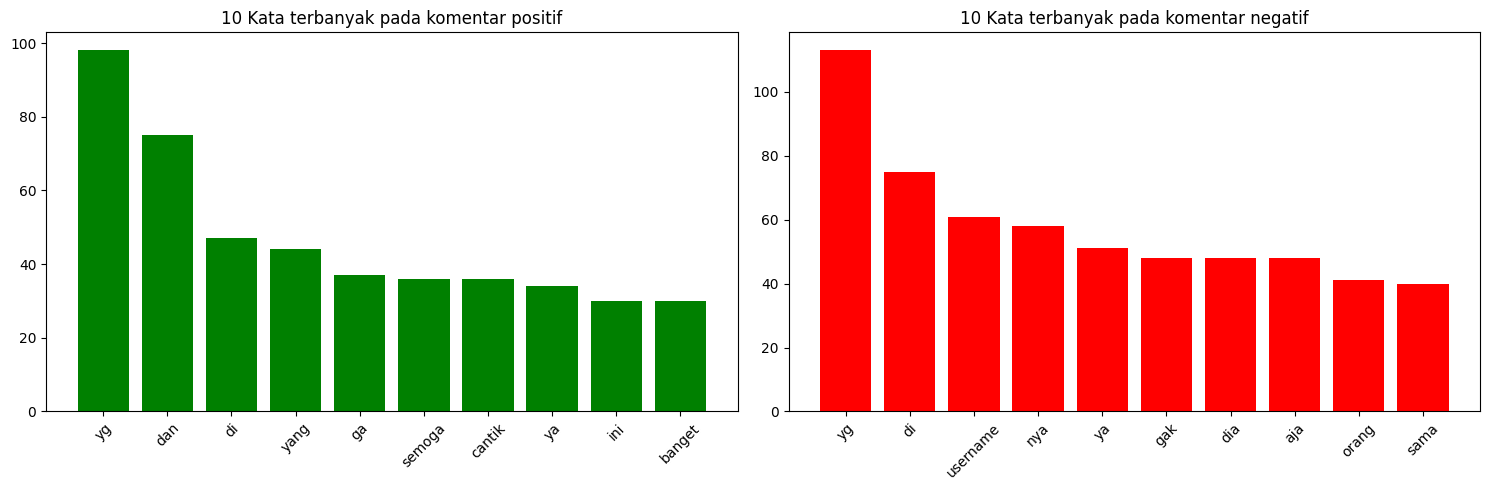

In [10]:
#Visualisasi
plt.figure(figsize=(15, 5))

#Visualisasi kata-kata positif
plt.subplot(1, 2, 1)
plt.bar(spam_positive_df['Word'], spam_positive_df['Frequency'], color='green')
plt.title('10 Kata terbanyak pada komentar positif')
plt.xticks(rotation=45)

#Visualisasi kata-kata negatif
plt.subplot(1, 2, 2)
plt.bar(spam_negative_df['Word'], spam_negative_df['Frequency'], color='red')
plt.title('10 Kata terbanyak pada komentar negatif')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Melakukan visualisasi dengan Word cloud pada komentar positif**

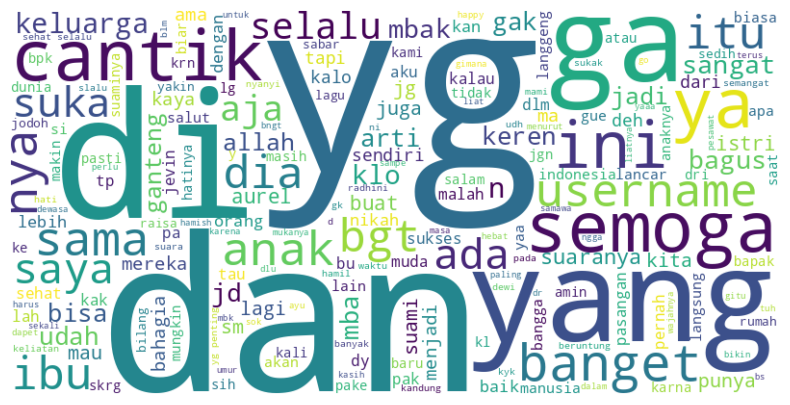

In [11]:
#Positive Wordcloud
positive_com_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_com))

plt.figure(figsize=(10, 5))
plt.imshow(positive_com_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Melakukan visualisasi dengan Word cloud pada komentar negatif**

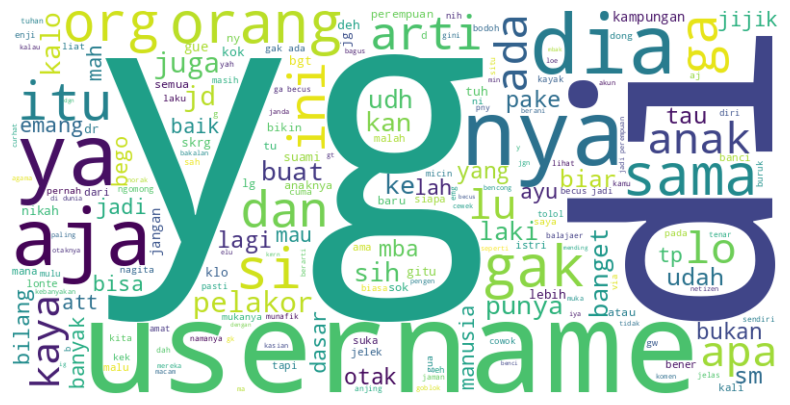

In [12]:
#Negative Wordcloud
negative_com_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_com))

plt.figure(figsize=(10, 5))
plt.imshow(negative_com_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature engineering

**Pembagian data train dan data testing**

In [13]:
X = data['Instagram Comment Text']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

**Pembobotan dengan TF-IDF**

In [14]:
#pembobotan
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

print(df_tfidf)

      10   15   16   17  1996  1katanya  20an   23   25   30  ...   yo  yoo  \
0    0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
1    0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
2    0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
3    0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
4    0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
..   ...  ...  ...  ...   ...       ...   ...  ...  ...  ...  ...  ...  ...   
395  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
396  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
397  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
398  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
399  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   

     you  youtube  yra  yuk  yutub  zaman  zholimi 

**Pembobotan TF-IDF pada data training dan data testing**

In [15]:
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# Modeling

In [16]:
model = GaussianNB()

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='positive')
precision = precision_score(y_test, y_pred, pos_label='positive')

print('Akurasi model = ', accuracy)
print('Recall model = ', recall)
print('Precision model = ', precision)

Akurasi model =  0.7875
Recall model =  0.725
Precision model =  0.8285714285714286


# Evaluation

**Matrix confusion**

In [17]:
confusion_mtrx = confusion_matrix(y_pred, y_test)

print(confusion_mtrx)

[[34 11]
 [ 6 29]]


**Laporan evaluasi**

In [ ]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

    negative       0.76      0.85      0.80        40
    positive       0.83      0.72      0.77        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



Model yang dibuat mendapatkan:
* nilai akurasi sebesar 0.79
* nilai presisi untuk data negatif = 0.76
* nilai presisi untuk data positif = 0.83
* nilai recall untuk data negatif = 0.85
* nilai recall untuk data positif = 0.72